# Employee Project

### Import the necessary libary
### Import the cleaned dataset

In [1]:
import pandas as pd

In [2]:
# load the cleaned dataset
data = pd.read_csv("C:/Users/DELL/Documents/Downloaded data/New/Employee/Employee cleaned dataset.csv")

###  Use Python to calculate employee tenure.

In [3]:
# Calculate tenure
data['calculated_tenure'] = data['age'] - data['age_when_joined']

# Preview results
print(data[['employee_id', 'age', 'age_when_joined', 'calculated_tenure']].head())


  employee_id  age  age_when_joined  calculated_tenure
0      E00001   41               38                  3
1      E00002   44               42                  2
2      E00003   41               40                  1
3      E00004   39               32                  7
4      E00005   30               22                  8


###  Perform statistical analysis on average tenure by department, age group, or gender.

In [4]:
# Create age group column
bins = [ 30, 39, 40, 49]
labels = ['30–35', '36–40', '41–45']
data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels, right=False)

# Statistical summary by department
tenure_by_dept = data.groupby('department')['calculated_tenure'].agg(['count', 'mean', 'std', 'min', 'max']).round(2)
print(" Average Tenure by Department:\n", tenure_by_dept)

# Statistical summary by age group
tenure_by_age_group = data.groupby('age_group')['calculated_tenure'].agg(['count', 'mean', 'std', 'min', 'max']).round(2)
print("\n Average Tenure by Age Group:\n", tenure_by_age_group)

# Statistical summary by gender
tenure_by_gender = data.groupby('Gender')['calculated_tenure'].agg(['count', 'mean', 'std', 'min', 'max']).round(2)
print("\n Average Tenure by Gender:\n", tenure_by_gender)


 Average Tenure by Department:
                   count  mean   std  min  max
department                                   
Customer Support    821  4.87  2.89   -4   12
Engineering         907  4.60  2.87   -3   13
Finance             819  4.68  2.96   -4   13
HR                  842  4.50  2.96   -4   14
Marketing           821  4.56  2.98   -5   13
Sales               790  4.56  3.00   -5   16

 Average Tenure by Age Group:
            count  mean   std  min  max
age_group                             
30–35       2713  5.53  2.76   -5   13
36–40        267  4.46  2.97   -3   16
41–45       1641  3.73  2.82   -5   13

 Average Tenure by Gender:
              count  mean   std  min  max
Gender                                  
Female        1298  4.54  2.98   -4   13
Male          1268  4.61  2.96   -4   13
Non Binary    1193  4.62  2.88   -5   13
Transgender   1241  4.74  2.95   -5   16


C:\Users\DELL\AppData\Local\Temp\ipykernel_6516\1028261911.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tenure_by_age_group = data.groupby('age_group')['calculated_tenure'].agg(['count', 'mean', 'std', 'min', 'max']).round(2)


In [11]:
print(data.sort_values(by='calculated_tenure'))

     employee_id    company   department  age  age_when_joined  \
4044      E04045   FinServe        Sales   34               39   
1316      E01317   FinServe    Marketing   42               47   
3753      E03754   TechCorp    Marketing   31               35   
1544      E01545    EduSoft      Finance   43               47   
94        E00095   TechCorp        Sales   42               46   
...          ...        ...          ...  ...              ...   
2497      E02498  HealthInc  Engineering   45               32   
1374      E01375  RetailHub  Engineering   36               23   
286       E00287   FinServe      Finance   43               30   
2602      E02603  RetailHub           HR   39               25   
946       E00947  HealthInc        Sales   39               23   

      years_in_the_company        salary  annual_bonus  \
4044                     1   67220.26143   19621.05410   
1316                     1  120910.63900   16441.08213   
3753                     1   6921

### Import necessary library for the correlation

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

Index(['employee_id', 'company', 'department', 'age', 'age_when_joined',
       'years_in_the_company', 'salary', 'annual_bonus',
       'prior_years_experience', 'full_time', 'part_time', 'Gender',
       'education_level', 'ethnicity', 'diversity_flag', 'Position',
       'fulltime', 'parttime', 'calculated_tenure', 'age_group'],
      dtype='object')
Correlation Matrix:
                         age    salary  performance_score
age                1.000000  0.039504          -0.000561
salary             0.039504  1.000000          -0.021182
performance_score -0.000561 -0.021182           1.000000


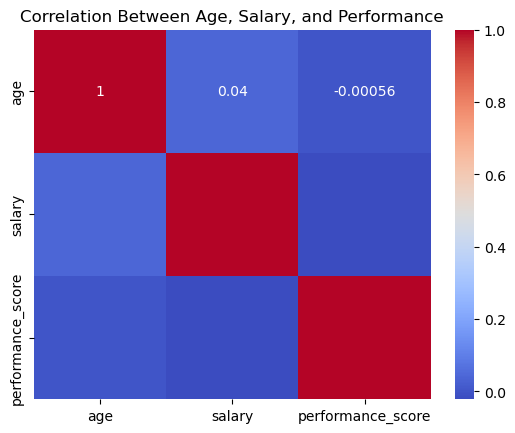

In [6]:
# Check available columns
print(data.columns)

# If performance column is missing, create a simulated one (example only)
import numpy as np
np.random.seed(42)
data['performance_score'] = np.random.randint(1, 6, size=len(data))  # Scores between 1 and 5

# Select relevant numeric columns
corr_data = data[['age', 'salary', 'performance_score']]

# Calculate correlation matrix
correlation_matrix = corr_data.corr()
print("Correlation Matrix:\n", correlation_matrix)

# Visualize with a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Between Age, Salary, and Performance')
plt.show()


In [7]:
print(data)

     employee_id    company        department  age  age_when_joined  \
0         E00001   FinServe  Customer Support   41               38   
1         E00002  RetailHub  Customer Support   44               42   
2         E00003    EduSoft       Engineering   41               40   
3         E00004  RetailHub           Finance   39               32   
4         E00005  RetailHub         Marketing   30               22   
...          ...        ...               ...  ...              ...   
4995      E04996   FinServe                HR   42               35   
4996      E04997   FinServe       Engineering   36               25   
4997      E04998  RetailHub         Marketing   35               30   
4998      E04999   FinServe                HR   49               48   
4999      E05000  RetailHub       Engineering   43               38   

      years_in_the_company        salary  annual_bonus  \
0                        3   68074.97135   17664.10410   
1                        2   49